# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = pd.read_csv("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [13]:
output_data_file.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
#create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#weather api 
url = 'http://api.openweathermap.org/data/2.5/weather'

#print statement
print('Beginning Data Retrieval')
print('-----------------------------')

record = 0
set_count = 1
for city in cities:
    #create parameters for api call 
    params={
        "q":city,
        "units":"imperial",
        "appid": weather_api_key
    }
    try:
        response = requests.get(url, params)
        #see if API call successful
        #print(response.url)
        results = response.json()
        #reformat to see data better
        #print(json.dumps(results, indent=4, sort_keys=True))
        cloudiness.append(results["clouds"]["all"])
        date.append(results["dt"])
        humidity.append(results["main"]["humidity"])
        lat.append(results["coord"]["lat"])
        lng.append(results["coord"]["lon"])
        max_temp.append(results["main"]["temp_max"])
        wind_speed.append(results["wind"]["speed"])
        #increase counter by one, include a set count 
        if record > 49:
            record = 0 
            set_count +=1
        else:
            record += 1
        country.append(results["sys"]["country"])
        city_name.append(city)
        print(f"Processing Record {record} of Set {set_count} | {city}")
        
    except Exception:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | saint anthony
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | nisia floresta
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | lasa
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | turayf
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | independence
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | okitipupa
Processing Record 16 of Set 1 | denpasar
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | opuwo
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | yar-sale
Processing Record 23 of Set 1 | tilichiki
Proce

Processing Record 39 of Set 4 | namibe
Processing Record 40 of Set 4 | soe
Processing Record 41 of Set 4 | itarema
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | el sauzal
Processing Record 44 of Set 4 | xunchang
Processing Record 45 of Set 4 | puerto quijarro
Processing Record 46 of Set 4 | nadym
Processing Record 47 of Set 4 | les cayes
Processing Record 48 of Set 4 | fairbanks
Processing Record 49 of Set 4 | banda aceh
Processing Record 50 of Set 4 | asfi
Processing Record 0 of Set 5 | gamba
Processing Record 1 of Set 5 | harindanga
Processing Record 2 of Set 5 | labuan
City not found. Skipping...
Processing Record 3 of Set 5 | san jose
Processing Record 4 of Set 5 | paamiut
Processing Record 5 of Set 5 | solnechnyy
Processing Record 6 of Set 5 | lakatoro
Processing Record 7 of Set 5 | sokoni
City not found. Skipping...
Processing Record 8 of Set 5 | severobaykalsk
Processing Record 9 of Set 5 | polunochnoye
Processing Record 10 of Set 5 | ust-tsilma
Cit

Processing Record 24 of Set 8 | yuncheng
Processing Record 25 of Set 8 | west bay
Processing Record 26 of Set 8 | gizo
Processing Record 27 of Set 8 | north bend
Processing Record 28 of Set 8 | berlevag
Processing Record 29 of Set 8 | tymovskoye
Processing Record 30 of Set 8 | campos altos
Processing Record 31 of Set 8 | galle
Processing Record 32 of Set 8 | alhadas
Processing Record 33 of Set 8 | jiayuguan
Processing Record 34 of Set 8 | gerede
Processing Record 35 of Set 8 | atasu
Processing Record 36 of Set 8 | sabang
Processing Record 37 of Set 8 | pozo colorado
City not found. Skipping...
Processing Record 38 of Set 8 | kantemirovka
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | navirai
Processing Record 41 of Set 8 | fort frances
Processing Record 42 of Set 8 | evensk
Processing Record 43 of Set 8 | tacoronte
Processing Record 44 of Set 8 | khudumelapye
Processing Record 45 of Set 8 | sao filipe
Processing Record 46 of Set 8 | sampit
Processing Recor

Processing Record 8 of Set 12 | belaya gora
Processing Record 9 of Set 12 | jardim
Processing Record 10 of Set 12 | iracoubo
Processing Record 11 of Set 12 | narsaq
Processing Record 12 of Set 12 | russell
Processing Record 13 of Set 12 | khash
Processing Record 14 of Set 12 | port hedland
Processing Record 15 of Set 12 | mega
Processing Record 16 of Set 12 | dickson
Processing Record 17 of Set 12 | cabra
Processing Record 18 of Set 12 | muzhi
Processing Record 19 of Set 12 | kuala terengganu
Processing Record 20 of Set 12 | port moresby
Processing Record 21 of Set 12 | camargo
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
#create dictionary with above lists
weather_data = pd.DataFrame({
    "City":city_name,
    "Cloudiness": cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Long":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
})
#create df from weather_data
weather_df = pd.DataFrame(weather_data)
#display count of weather data
weather_df.count()

City          582
Cloudiness    582
Country       582
Date          582
Humidity      582
Lat           582
Long          582
Max Temp      582
Wind Speed    582
dtype: int64

In [83]:
#save df as CSV
weather_df.to_csv("../output_data/weather_df")

#display data
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,saint anthony,90,US,1584639034,100,45.02,-93.22,39.99,4.70
1,luderitz,0,NA,1584639034,64,-26.65,15.16,71.60,9.17
2,kodiak,1,US,1584639035,80,57.79,-152.41,30.20,4.70
3,avarua,100,CK,1584639035,100,-21.21,-159.78,75.20,5.82
4,bengkulu,100,ID,1584638915,86,-3.80,102.27,74.75,3.13


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

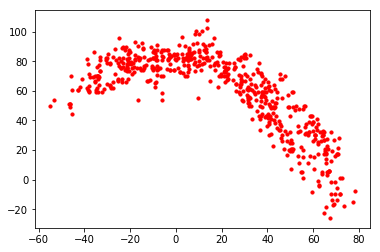

In [87]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", color="red", s=10)

#### Latitude vs. Humidity Plot

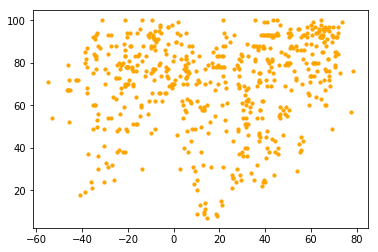

In [86]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", color="orange", s=10)

#### Latitude vs. Cloudiness Plot

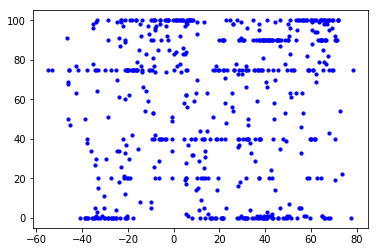

In [88]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", color="blue", s=10)

#### Latitude vs. Wind Speed Plot

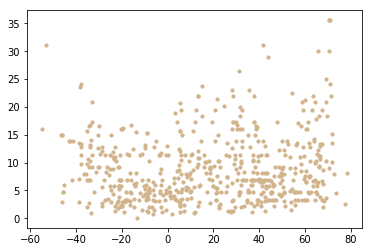

In [91]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", color="tan", s=10)

## Linear Regression

In [104]:
# OPTIONAL: Create a function to create Linear Regression plots

In [103]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression